# **Subscribe term deposit prediction with Bank data** 

**Abstract**: The data is related with direct marketing campaigns (phone calls) of a  banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#**Attribute Information:**

*   age (numeric)
*   job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

*   marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
*   education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

*   default: has credit in default? (categorical: 'no','yes','unknown')

*   housing: has housing loan? (categorical: 'no','yes','unknown')
*   loan: has personal loan? (categorical: 'no','yes','unknown'


*  contact: contact communication type (categorical: 'cellular','telephone')



*   month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

*   day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
*   duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no').


*   campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)


*   pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

*   previous: number of contacts performed before this campaign and for this client (numeric)
*   poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success'
















In [145]:
#library used for data manipulation and analysis
import pandas as pd
# library used for working with arrays.
import numpy as np
# library for plots and visualisations
import matplotlib.pyplot as plt
# library for visualisations
import seaborn as sns
%matplotlib inline 
# to restrict the float value to 2 decimal places
import warnings
warnings.filterwarnings("ignore")

#**Reading the data**

In [146]:
df=pd.read_excel("/content/Train_Data.xlsx")

In [147]:
df.head(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no




*   It will provide info about first 10 rows




In [148]:
#fetching last 10 lows
df.tail(10)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
36158,33,housemaid,married,secondary,no,826,yes,no,cellular,11,may,256,1,-1,0,unknown,no
36159,43,services,single,secondary,no,518,yes,no,cellular,11,may,295,1,370,1,failure,no
36160,40,blue-collar,single,primary,no,0,yes,yes,cellular,11,may,114,2,-1,0,unknown,no
36161,24,services,married,secondary,no,4500,yes,no,cellular,11,may,733,2,-1,0,unknown,yes
36162,47,blue-collar,married,secondary,no,71,yes,no,cellular,11,may,170,1,370,1,failure,no
36163,30,self-employed,single,tertiary,no,137,yes,no,cellular,11,may,214,1,-1,0,unknown,no
36164,54,technician,divorced,secondary,no,1252,yes,no,cellular,11,may,101,1,350,1,failure,no
36165,40,management,married,tertiary,no,-17,yes,yes,cellular,11,may,474,1,256,1,success,yes
36166,45,blue-collar,married,unknown,no,-72,yes,no,cellular,11,may,306,1,-1,0,unknown,no
36167,41,self-employed,single,tertiary,no,428,yes,no,cellular,11,may,106,1,-1,0,unknown,no




*   It will provide info about last 10 rows of dataset




In [149]:
#getting basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36168 entries, 0 to 36167
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.7+ MB




*   Data has only float and integer values
*   No variable column has null/missing values



In [150]:
df.rename(columns={'y':'target'}, inplace=True)

In [151]:
#to extract details about null values
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
target       0
dtype: int64

In [152]:
#data description
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.840743,1287.631166,16.173330,255.643995,2.931459,22.493890,0.318652
std,9.651947,2905.161234,8.525741,260.655720,3.345965,74.662548,2.013822
min,19.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,52.000000,8.000000,100.000000,1.000000,-1.000000,0.000000
50%,39.000000,409.000000,17.000000,175.000000,2.000000,-1.000000,0.000000
75%,48.000000,1330.000000,22.000000,313.000000,3.000000,-1.000000,0.000000
max,95.000000,98417.000000,31.000000,4918.000000,63.000000,371.000000,275.000000




*   Average age of the customers is above 40 years.

*   Many features conatin outliers as we can see there is differnce in there 75th and max values.

*  Minimum age of custommer is around 19 years





#**Analysis** **of** '**Target**' **variable**

In [153]:
#Frequency of 'target'
df['target'].value_counts()

no     33735
yes     2433
Name: target, dtype: int64



*   It is cleaarly visible that this is an imbalanced class dataset



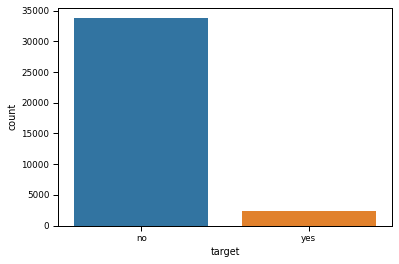

In [154]:
# Plotting the 'target' frequency
sns.countplot(data=df, x='target')

In [155]:
#Normalizing the frequency table of 'Target' variable
df['target'].value_counts(normalize=True)

no     0.932731
yes    0.067269
Name: target, dtype: float64

From the above analysis we can see that only 2433 people out of 33,735 have 
subscribed which is 6.72%.

#**Analysis of 'Categorical' features**

**Feature:- Job**

In [156]:
#Frequency tabled
df['job'].value_counts()

blue-collar      8166
management       7557
technician       6348
admin.           3967
services         3444
retired          1367
self-employed    1305
entrepreneur     1296
unemployed       1042
housemaid        1031
student           416
unknown           229
Name: job, dtype: int64

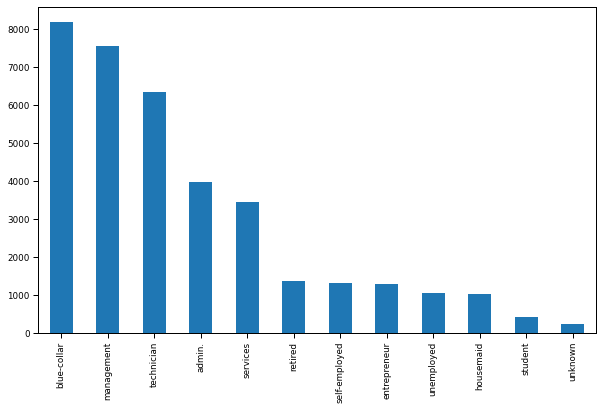

In [157]:
# Plotting the job frequency table
sns.set_context('paper')
df['job'].value_counts().plot(kind='bar', figsize=(10,6));

We can see that most of the clients beloned to blue-collar job and students are least in general as they don't make term deposits in general.

In [158]:

#job vs target
print(pd.crosstab(df['job'],df['target']))

target           no  yes
job                     
admin.         3692  275
blue-collar    7736  430
entrepreneur   1218   78
housemaid       985   46
management     6969  588
retired        1227  140
self-employed  1206   99
services       3263  181
student         355   61
technician     5917  431
unemployed      955   87
unknown         212   17


In [159]:
job = pd.crosstab(df['job'],df['target'])
job_norm = job.div(job.sum(1).astype(float), axis=0)
job_norm

target,no,yes
job,,
admin.,0.930678,0.069322
blue-collar,0.947343,0.052657
entrepreneur,0.939815,0.060185
housemaid,0.955383,0.044617
management,0.922191,0.077809
retired,0.897586,0.102414
self-employed,0.924138,0.075862
services,0.947445,0.052555
student,0.853365,0.146635


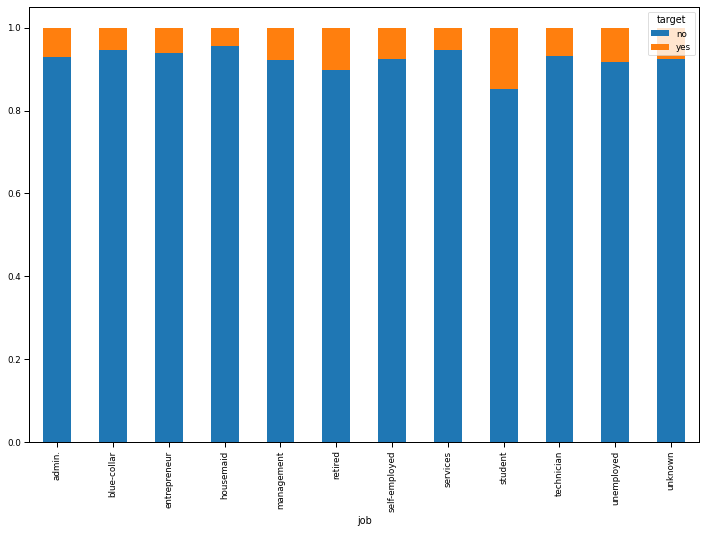

In [160]:
job_norm.plot.bar(stacked=True,figsize=(12,8));

From the above graph we can infer that students and retired people have higher chances of subscribing to a term deposit, which is surprising as students generally do not subscribe to a term deposit. The possible reason is that the number of students in the dataset is less and comparatively to other job types, more students have subscribed to a term deposit.

**Feature:- 'marital' status**

In [161]:
df['marital'].value_counts()

married     22389
single       9494
divorced     4285
Name: marital, dtype: int64

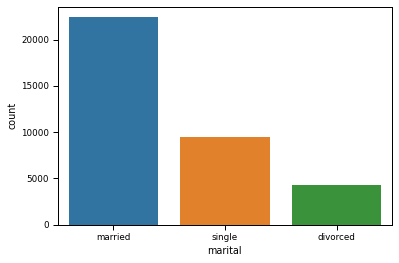

In [162]:
sns.countplot(data=df, x='marital');

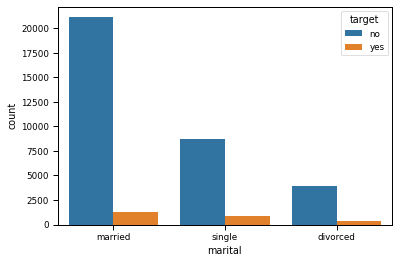

In [163]:
sns.countplot(data=df, x='marital', hue='target');

In [164]:
#Marital status vs target
pd.crosstab(df['marital'], df['target'])

target,no,yes
marital,,
divorced,3951,334
married,21116,1273
single,8668,826


In [165]:
marital = pd.crosstab(df['marital'], df['target'])
marital_norm = marital.div(marital.sum(1).astype(float), axis=0)
marital_norm

target,no,yes
marital,,
divorced,0.922054,0.077946
married,0.943142,0.056858
single,0.912998,0.087002


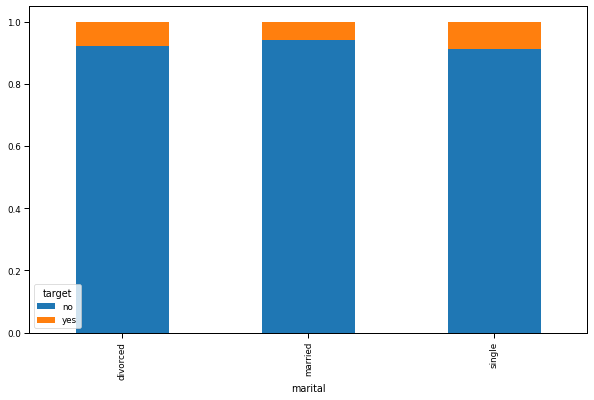

In [166]:
marital_norm.plot.bar(stacked=True, figsize=(10,6));

From the above analysis we can infer that marital status doesn't have a major impact on the subscription to term deposits.

**Feature:- "Default"**

In [167]:
#default vs target
pd.crosstab(df['default'], df['target'])

target,no,yes
default,,
no,33007,2386
yes,728,47


In [168]:
dflt = pd.crosstab(df['default'], df['target'])
dflt_norm = dflt.div(dflt.sum(1).astype(float), axis=0)
dflt_norm

target,no,yes
default,,
no,0.932586,0.067414
yes,0.939355,0.060645


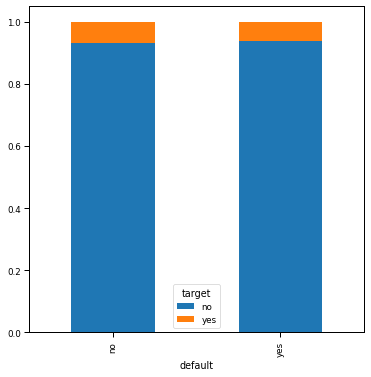

In [169]:
dflt_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients having no previous default have slightly higher chances of subscribing to a term loan as compared to the clients who have previous default history.

**Feature:- "Education"**

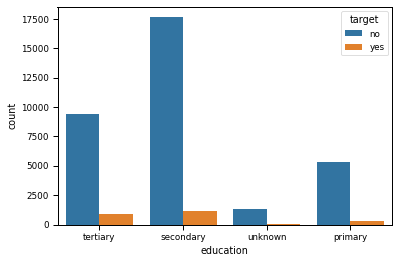

In [170]:
sns.countplot(data=df, x='education', hue='target');

In [171]:
#eduaction vs target
pd.crosstab(df['education'], df['target'])

target,no,yes
education,,
primary,5327,300
secondary,17643,1166
tertiary,9425,884
unknown,1340,83


In [172]:
edu = pd.crosstab(df['education'], df['target'])
edu_norm = edu.div(edu.sum(1).astype(float), axis=0)
edu_norm

target,no,yes
education,,
primary,0.946686,0.053314
secondary,0.938008,0.061992
tertiary,0.914250,0.085750
unknown,0.941673,0.058327


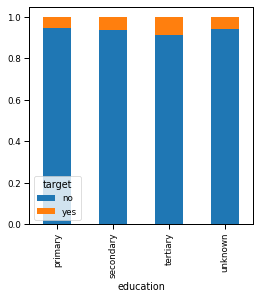

In [173]:
edu_norm.plot.bar(stacked=True, figsize=(4,4))

We can infer that clients having tertiary education have slightly higher chances of subscribing to a term loan as compared to other clients.

**Feature:-"housing"**

In [174]:
df["housing"].value_counts()

yes    20857
no     15311
Name: housing, dtype: int64

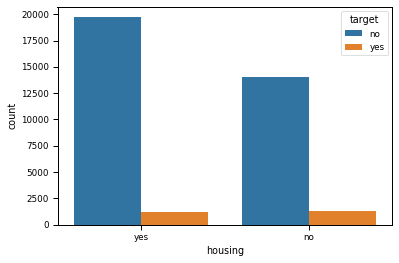

In [175]:
sns.countplot(data=df, x='housing', hue='target');



In [176]:
#housing vs target
pd.crosstab(df['housing'], df['target'])

target,no,yes
housing,,
no,14031,1280
yes,19704,1153


In [177]:
hous = pd.crosstab(df['housing'], df['target'])
hous_norm =hous.div(hous.sum(1).astype(float), axis=0)
hous_norm

target,no,yes
housing,,
no,0.916400,0.083600
yes,0.944719,0.055281


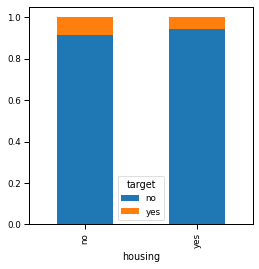

In [178]:
hous_norm.plot.bar(stacked=True, figsize=(4,4))

We can infer that clients who does not have housing loan have slightly higher chances of subscribing to a term loan as compared to other clients who have housing loan.

**Feature:-"Loan"**

In [179]:
df["loan"].value_counts()

no     29737
yes     6431
Name: loan, dtype: int64

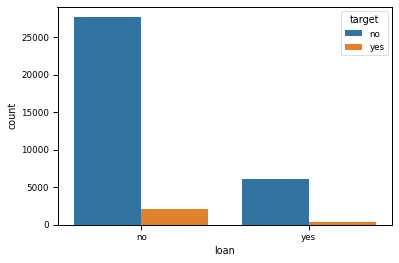

In [180]:
sns.countplot(data=df, x='loan', hue='target')

In [181]:
#MLoan vs target
pd.crosstab(df['loan'], df['target'])

target,no,yes
loan,,
no,27631,2106
yes,6104,327


In [182]:
loan = pd.crosstab(df['housing'], df['target'])
loan_norm = loan.div(loan.sum(1).astype(float), axis=0)
loan_norm

target,no,yes
housing,,
no,0.916400,0.083600
yes,0.944719,0.055281


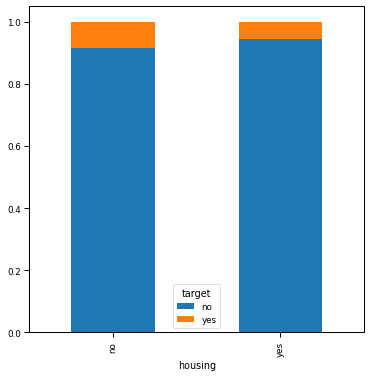

In [183]:
loan_norm.plot.bar(stacked=True, figsize=(6,6));

We can infer that clients who does not have personal loan have slightly higher chances of subscribing to a term loan as compared to other clients who have personal loan.

**Feature:-Contact**

In [184]:
df["contact"].value_counts()

cellular     21396
unknown      12765
telephone     2007
Name: contact, dtype: int64

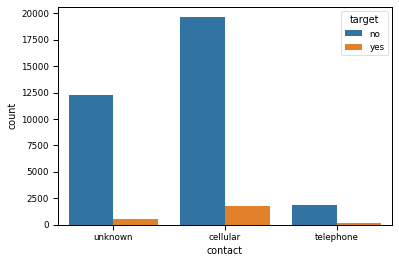

In [185]:
sns.countplot(data=df, x='contact', hue= 'target')

In [186]:
#MContact vs target
pd.crosstab(df['contact'], df['target'])

target,no,yes
contact,,
cellular,19614,1782
telephone,1853,154
unknown,12268,497


In [187]:
cont = pd.crosstab(df['contact'], df['target'])
cont_norm = cont.div(cont.sum(1).astype(float), axis=0)
cont_norm

target,no,yes
contact,,
cellular,0.916713,0.083287
telephone,0.923269,0.076731
unknown,0.961065,0.038935


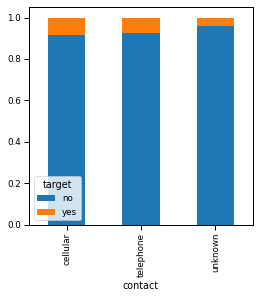

In [188]:
cont_norm.plot.bar(stacked=True, figsize=(4,4));

**Feature:-"Poutcome"**

In [189]:
df["poutcome"].value_counts()

unknown    32350
failure     2677
other        931
success      210
Name: poutcome, dtype: int64

In [190]:
#Poutcome status vs target
pd.crosstab(df['poutcome'], df['target'])

target,no,yes
poutcome,,
failure,2535,142
other,870,61
success,136,74
unknown,30194,2156


In [191]:
pout = pd.crosstab(df['poutcome'], df['target'])
pout_norm = pout.div(pout.sum(1).astype(float), axis=0)
pout_norm

target,no,yes
poutcome,,
failure,0.946956,0.053044
other,0.934479,0.065521
success,0.647619,0.352381
unknown,0.933354,0.066646


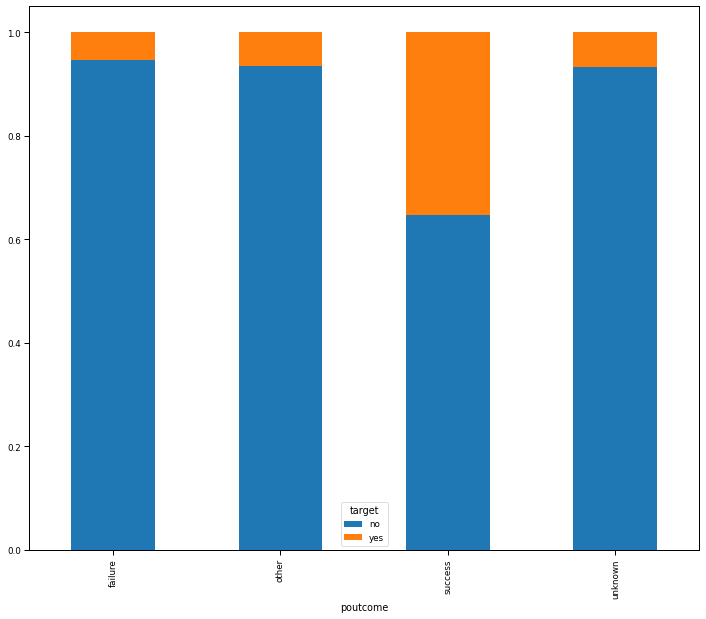

In [192]:
pout_norm.plot.bar(stacked=True, figsize=(12,10));

We can infer the info that customer who had invested previously have higher chances of subscribing term deposit. 

**Feature:- "Month"**

In [193]:
df["month"].value_counts()

may    9948
jul    6380
aug    5215
jun    4486
nov    3598
apr    2718
feb    2296
jan    1176
mar     258
oct      80
dec      13
Name: month, dtype: int64

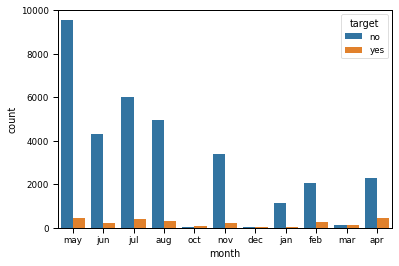

In [194]:
sns.countplot(data=df, x='month', hue= 'target');

In [195]:
#Month vs target
pd.crosstab(df['month'], df['target'])

target,no,yes
month,,
apr,2267,451
aug,4927,288
dec,12,1
feb,2041,255
jan,1138,38
jul,5996,384
jun,4285,201
mar,133,125
may,9527,421


In [196]:
month = pd.crosstab(df['month'], df['target'])
month_norm = month.div(month.sum(1).astype(float), axis=0)
month_norm

target,no,yes
month,,
apr,0.834069,0.165931
aug,0.944775,0.055225
dec,0.923077,0.076923
feb,0.888937,0.111063
jan,0.967687,0.032313
jul,0.939812,0.060188
jun,0.955194,0.044806
mar,0.515504,0.484496
may,0.957680,0.042320


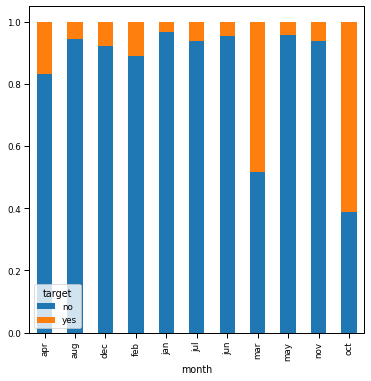

In [197]:
month_norm.plot.bar(stacked=True, figsize=(6,6))

We can infer that clients are mostly subscribing to term deposit in march and october month.

#**Analysis of "Numerical" Features**

In [198]:
df["day"].value_counts()


20    2655
21    1914
17    1812
6     1778
5     1691
19    1650
28    1625
8     1620
7     1612
29    1600
18    1544
30    1457
9     1374
16    1215
4     1183
14    1081
2      994
11     964
27     901
3      827
15     825
23     823
12     797
26     769
13     758
22     699
25     603
31     591
10     364
24     352
1       90
Name: day, dtype: int64

 **Feature: Age (Numeric)**

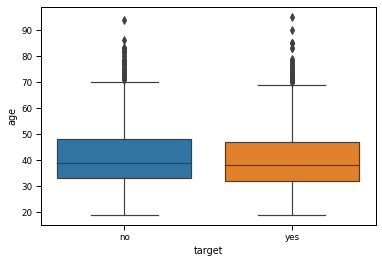

In [199]:
%matplotlib inline
sns.boxplot(data=df,x="target", y="age")
plt.show()

From the above boxplot we know that for both the customers that subscibed or didn't subscribe a term deposit, has a median age of around 38-40. And the boxplot for both the classes overlap quite a lot, which means that age isn't necessarily a good indicator for which customer will subscribe and which customer will not.

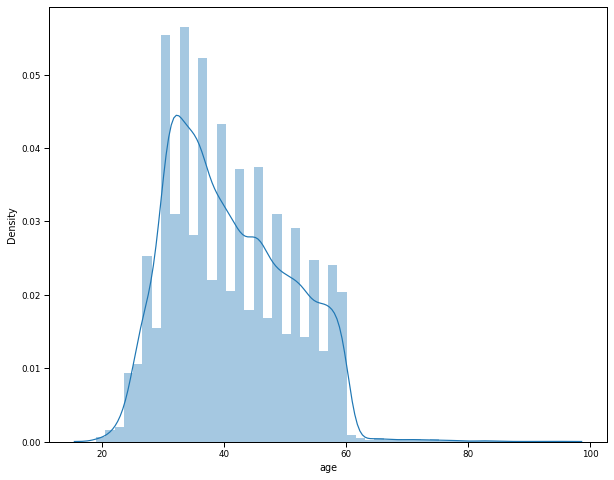

In [200]:
plt.figure(figsize=(10,8))
sns.distplot(df["age"])

As we can see in the above distribution also, that most of the customers are in the age range of 30-40.

**Feature: duration (numeric)**

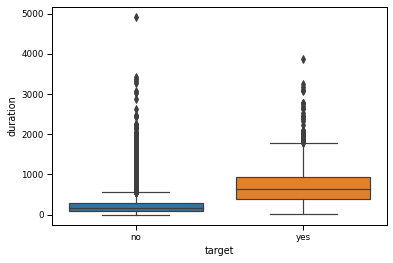

In [201]:
%matplotlib inline
sns.boxplot(data=df, x="target", y="duration")
plt.show()

From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable

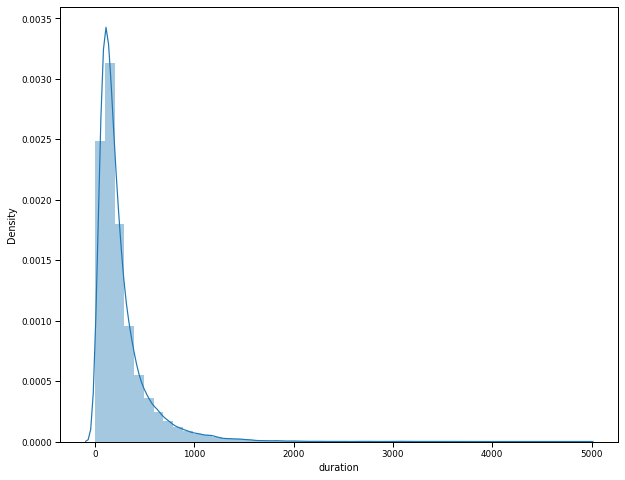

In [202]:
plt.figure(figsize=(10,8))
sns.distplot(df["duration"])

This seems like a powerlaw distribution where most the values are very low and very few have high values.

**Feature: campaign (numeric)**

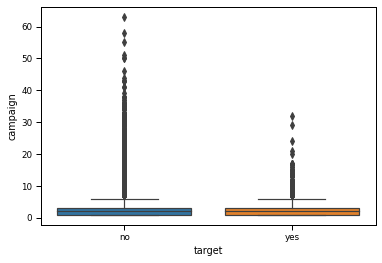

In [203]:
%matplotlib inline
sns.boxplot(data=df, x="target", y="campaign")
plt.show()

From the above plot it is clear that, the campaign (last contact) of a customer might not be useful for predicting the target variable

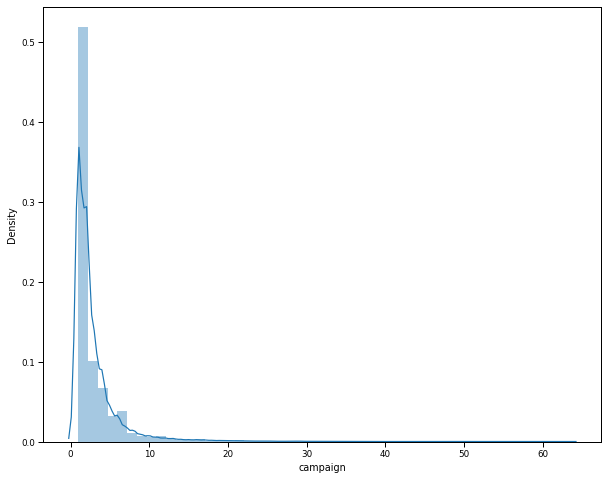

In [204]:
plt.figure(figsize=(10,8))
sns.distplot(df["campaign"])

This seems like a powerlaw distribution where most the values are very low and very few have high values.

**Feature:-"Pdays"**

In [205]:
df["pdays"].value_counts()

-1      32350
 343       44
 182       43
 170       41
 167       41
        ...  
 71         1
 29         1
 49         1
 64         1
 369        1
Name: pdays, Length: 339, dtype: int64

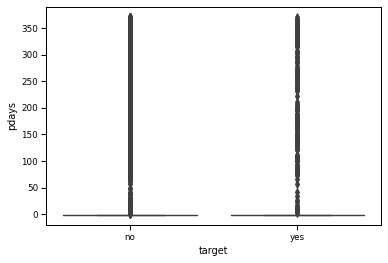

In [206]:
%matplotlib inline
sns.boxplot(data=df, x="target", y="pdays")
plt.show()

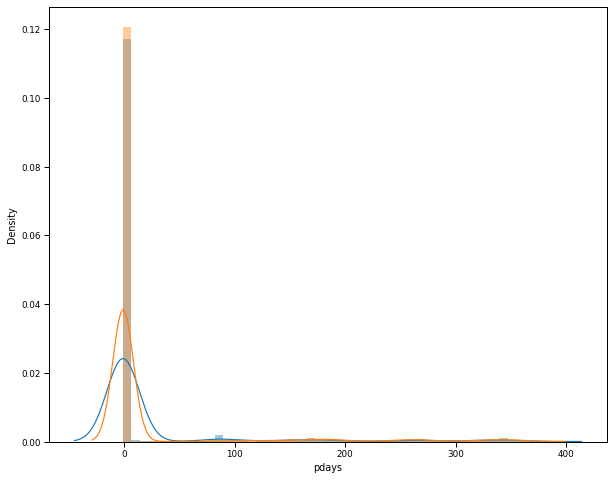

In [207]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df[df["target"]=="yes"]["pdays"])
sns.distplot(df[df["target"]=="no"]["pdays"])
plt.show()

It infer that most of the custoers was not contacted before.

**Feature:-"Balance"**

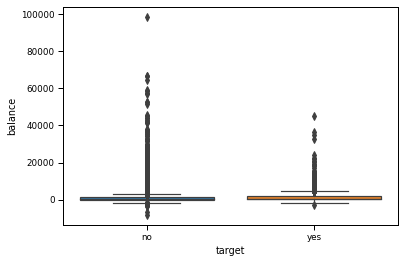

In [208]:
%matplotlib inline
sns.boxplot(data=df, x="target", y="balance")
plt.show()

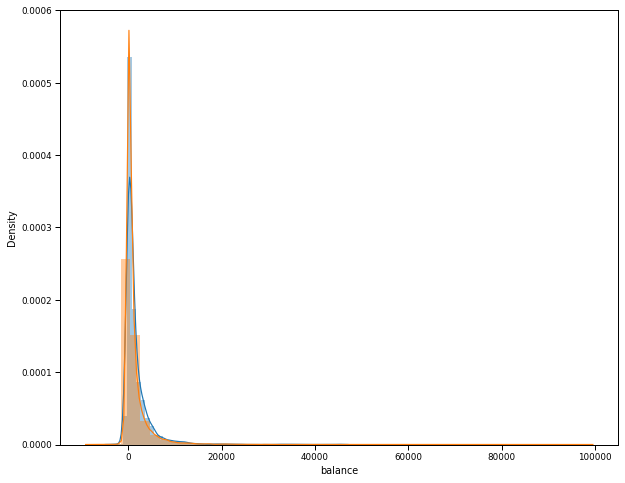

In [209]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(df[df["target"]=="yes"]["balance"])
sns.distplot(df[df["target"]=="no"]["balance"])
plt.show()

It infer that most of the custoers was not contacted before.

#**Feature Engineering**

**Correlation matrix of numerical features**

Text(0.5, 1.05, 'Pearson correlation of Features')

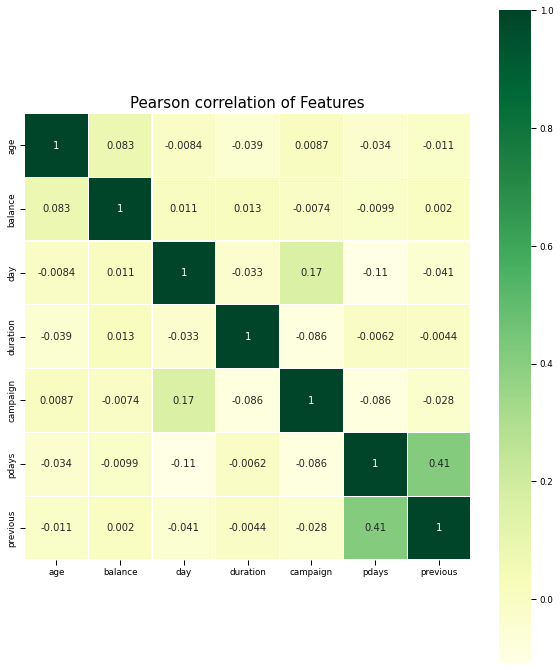

In [210]:
%matplotlib inline
corr = df.corr()

f, ax = plt.subplots(figsize=(10,12))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

_ = sns.heatmap(corr, cmap="YlGn", square=True, ax=ax, annot=True, linewidth=0.1)

plt.title("Pearson correlation of Features", y=1.05, size=15)

In [211]:

# list categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome']

In [212]:
# list numerical columns
num_cols = ['duration', 'balance', 'campaign','day', 'age','previous']

In [213]:
# Y into 1 and 0
df['target'] = (df.target == 'yes').astype('int')

In [214]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
        
            le.fit(df[col])
            df[col] = le.transform(df[col])
            
           
            le_count += 1
            print('%d columns were label encoded.' % le_count)

1 columns were label encoded.
2 columns were label encoded.
3 columns were label encoded.


In [215]:
pd.set_option("display.max_columns",None)

In [216]:
df = pd.get_dummies(df)
df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [217]:
df.drop(['pdays','poutcome_unknown','contact_unknown'],axis=1,inplace=True)

**Standard Scaler**

In [218]:
# import library for rescaling
from sklearn.preprocessing import StandardScaler

In [219]:
# rescale our numerical columns
scaler = StandardScaler()
scaler.fit(df[num_cols])
data_scaled = scaler.transform(df[num_cols])
columns_value_new = df[num_cols].columns
data_scaled_d = pd.DataFrame(data_scaled, columns = columns_value_new)
data_scaled_d.head(10)

,duration,balance,campaign,day,age,previous
0,0.020548,0.294435,-0.577258,-1.310559,1.777827,-0.158235
1,-0.401470,-0.433246,-0.577258,-1.310559,0.327323,-0.158235
2,-0.689210,-0.442540,-0.577258,-1.310559,-0.812360,-0.158235
3,-0.627825,0.075167,-0.577258,-1.310559,0.638145,-0.158235
4,-0.221153,-0.442884,-0.577258,-1.310559,-0.812360,-0.158235
5,-0.447508,-0.363713,-0.577258,-1.310559,-0.605145,-0.158235
6,-0.148259,-0.289362,-0.577258,-1.310559,-1.330397,-0.158235
7,0.477096,-0.442540,-0.577258,-1.310559,0.120108,-0.158235
8,-0.788960,-0.401577,-0.577258,-1.310559,1.777827,-0.158235
9,-0.769777,-0.239106,-0.577258,-1.310559,0.223715,-0.158235


**Combining tables**

In [220]:
# Now we need to combite all tables and We will remove less important num cols
data1 = df.drop(num_cols, axis =1) 
result = pd.concat([data_scaled_d, data1], axis=1, join='inner')
display(result)

,duration,balance,campaign,day,age,previous,default,housing,loan,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_other,poutcome_success
0,0.020548,0.294435,-0.577258,-1.310559,1.777827,-0.158235,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-0.401470,-0.433246,-0.577258,-1.310559,0.327323,-0.158235,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.689210,-0.442540,-0.577258,-1.310559,-0.812360,-0.158235,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,-0.627825,0.075167,-0.577258,-1.310559,0.638145,-0.158235,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.221153,-0.442884,-0.577258,-1.310559,-0.812360,-0.158235,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36163,-0.159768,-0.396070,-0.577258,-0.606798,-1.123182,-0.158235,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
36164,-0.593297,-0.012265,-0.577258,-0.606798,1.363397,0.338340,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
36165,0.837730,-0.449080,-0.577258,-0.606798,-0.087107,0.338340,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
36166,0.193192,-0.468012,-0.577258,-0.606798,0.430930,-0.158235,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [221]:
# Chosing target and dropin target and not impotant variables
data = result.drop(columns=['target'])
target = result.filter(['target'], axis =1)

In [222]:
# Split data on 70/30
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size = 0.3,random_state=10)

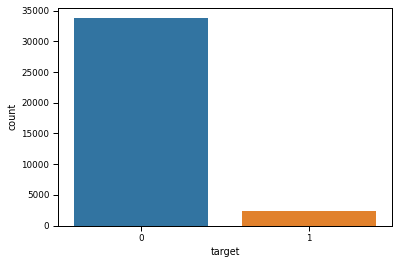

In [223]:
# Plot to check inbalance
sns.countplot(x ='target', data = result)
plt.show()

**Using Smote for imbalanced dependent feature**

In [224]:
# Importing the necessary function 
from imblearn.over_sampling import SMOTE

In [225]:
# creating an instance
sm = SMOTE(random_state=27)
# applying it to the training set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

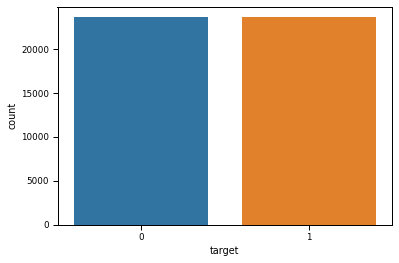

In [226]:
# Recheck inbalance
sns.countplot(x ='target', data = y_train_smote)
plt.show()

Logistic Regression

In [227]:
# Import libraries
from sklearn.linear_model import LogisticRegression


In [228]:
# Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train_smote,y_train_smote)
y_pred = logmodel.predict(X_test)

In [229]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [230]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.95     10107
           1       0.43      0.63      0.51       744

    accuracy                           0.92     10851
   macro avg       0.70      0.78      0.73     10851
weighted avg       0.93      0.92      0.92     10851



In [231]:
print(confusion_matrix(y_test,y_pred))

[[9481  626]
 [ 274  470]]


In [232]:
from sklearn.metrics import roc_auc_score


In [233]:
print("AUC score is: ", roc_auc_score(y_test, y_pred))

AUC score is:  0.7848915794546737


DecisonTreeClassifier

In [234]:
from sklearn.tree import DecisionTreeClassifier

In [235]:
dt = DecisionTreeClassifier()
dt.fit(X_train_smote,y_train_smote)
y_pred_dt = dt.predict(X_test)

In [236]:
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95     10107
           1       0.36      0.54      0.43       744

    accuracy                           0.90     10851
   macro avg       0.66      0.74      0.69     10851
weighted avg       0.92      0.90      0.91     10851

[[9391  716]
 [ 340  404]]
0.9026817804810616


RandomForestClassifier

In [237]:
from sklearn.ensemble import RandomForestClassifier

In [238]:
# Logistic Regression
logmodel1 = RandomForestClassifier(n_estimators=300,max_samples=.5,n_jobs=-1,class_weight='balanced')
logmodel1.fit(X_train_smote,y_train_smote)
y_pred = logmodel1.predict(X_test)

In [239]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     10107
           1       0.44      0.63      0.52       744

    accuracy                           0.92     10851
   macro avg       0.71      0.79      0.74     10851
weighted avg       0.94      0.92      0.93     10851



In [240]:
print("AUC score is: ", roc_auc_score(y_test, y_pred))

AUC score is:  0.7871466837101082


GradientBoostingClassifier

In [241]:
from sklearn.ensemble import GradientBoostingClassifier

In [242]:
logmodel2 = GradientBoostingClassifier()
logmodel2.fit(X_train_smote,y_train_smote)
y_pred = logmodel2.predict(X_test)

In [243]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     10107
           1       0.39      0.79      0.52       744

    accuracy                           0.90     10851
   macro avg       0.69      0.85      0.73     10851
weighted avg       0.94      0.90      0.92     10851



In [244]:
print("AUC score is: ", roc_auc_score(y_test, y_pred))

AUC score is:  0.8509718192756857


XGBClassifier

In [245]:
from xgboost import XGBClassifier

In [246]:
logmodel3 = XGBClassifier()
logmodel3.fit(X_train_smote,y_train_smote)
y_pred = logmodel3.predict(X_test)

In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10107
           1       0.37      0.81      0.51       744

    accuracy                           0.89     10851
   macro avg       0.68      0.86      0.73     10851
weighted avg       0.94      0.89      0.91     10851



In [248]:
print("AUC score is: ", roc_auc_score(y_test, y_pred))

AUC score is:  0.855375506276391


In [249]:
#importing Support Vector Classifier
from sklearn.svm import SVC

In [250]:
y_pred_svm = logmodel3.predict(X_test)

In [251]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94     10107
           1       0.37      0.81      0.51       744

    accuracy                           0.89     10851
   macro avg       0.68      0.86      0.73     10851
weighted avg       0.94      0.89      0.91     10851



**Importing Test data**

In [252]:
df1=pd.read_excel("/content/Test_Data.xlsx")

In [253]:
df1.rename(columns={'y':'target'}, inplace=True)

In [254]:
# list categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing',
            'loan', 'contact', 'month', 'poutcome']

In [255]:
# list numerical columns
num_cols = ['duration', 'balance', 'campaign','day', 'age','previous']

Label Encoding

In [256]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in df1:
    if df1[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df1[col].unique())) <= 2:
        
            le.fit(df1[col])
            df1[col] = le.transform(df1[col])
            
           
            le_count += 1
            print('%d columns were label encoded.' % le_count)

1 columns were label encoded.
2 columns were label encoded.
3 columns were label encoded.


Creating dummies

In [257]:
df1 = pd.get_dummies(df1)
df1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,target,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,35,0,41,1,0,11,14,5,-1,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,40,0,1844,1,0,11,231,1,-1,0,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,40,0,98,1,0,11,240,2,343,5,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,49,0,24,1,0,11,701,1,362,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,33,0,358,0,0,11,231,1,350,1,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0


In [258]:
df1.drop(['pdays','poutcome_unknown','contact_unknown'],axis=1,inplace=True)

In [259]:
df1.drop(['month_sep'],axis=1,inplace=True)

Data Scaling

In [260]:
# import library for rescaling
from sklearn.preprocessing import StandardScaler

In [261]:
# rescale our numerical columns
scaler_1 = StandardScaler()
scaler_1.fit(df1[num_cols])
data_scaled_1 = scaler_1.transform(df1[num_cols])
columns_value_new_1 = df1[num_cols].columns
data_scaled_d_1 = pd.DataFrame(data_scaled_1, columns = columns_value_new_1)
data_scaled_d_1.head(10)

,duration,balance,campaign,day,age,previous
0,-1.040430,-0.458493,1.786898,-0.45918,-0.457208,-0.544193
1,-0.152392,0.051855,-0.672228,-0.45918,-0.095380,-0.544193
2,-0.115561,-0.442359,-0.057447,-0.45918,-0.095380,1.128298
3,1.771009,-0.463305,-0.672228,-0.45918,0.555910,-0.209695
4,-0.152392,-0.368764,-0.672228,-0.45918,-0.601940,-0.209695
5,1.627777,-0.524444,-0.672228,-0.45918,-0.095380,-0.544193
6,-0.086914,-0.470098,-0.057447,-0.45918,-0.746671,0.793800
7,-0.119653,0.212630,1.786898,-0.45918,-1.325595,0.124803
8,1.816024,-0.422262,-0.672228,-0.45918,-0.023015,-0.544193
9,-0.201500,0.109598,-0.672228,-0.45918,-0.457208,0.124803


In [262]:
df1.drop(["target"],axis=1,inplace=True)

In [263]:
columns_value_new_1

Index(['duration', 'balance', 'campaign', 'day', 'age', 'previous'], dtype='object')

In [264]:
data2 = df1.drop(num_cols, axis =1) 
result1 = pd.concat([data_scaled_d_1, data2], axis=1, join='inner')
display(result1)

,duration,balance,campaign,day,age,previous,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,poutcome_failure,poutcome_other,poutcome_success
0,-1.040430,-0.458493,1.786898,-0.459180,-0.457208,-0.544193,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-0.152392,0.051855,-0.672228,-0.459180,-0.095380,-0.544193,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,-0.115561,-0.442359,-0.057447,-0.459180,-0.095380,1.128298,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
3,1.771009,-0.463305,-0.672228,-0.459180,0.555910,-0.209695,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,-0.152392,-0.368764,-0.672228,-0.459180,-0.601940,-0.209695,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9038,2.900495,-0.236578,0.557335,0.365957,0.700641,-0.544193,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9039,0.768385,0.019304,-0.057447,0.365957,2.147953,-0.544193,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
9040,3.514346,1.147560,1.786898,0.365957,2.220318,0.459302,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
9041,0.981187,-0.281017,1.172116,0.365957,1.134834,-0.544193,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


**Prediction using Logistic Regression**

In [265]:
Y_pred_test_LogisticRegression = logmodel.predict(result1)

In [266]:
Y_pred_test_LogisticRegression

array([0, 0, 0, ..., 1, 0, 0])

**Prediction using Gradient Boosting**

In [267]:
Y_pred_test_gradientboosting = logmodel2.predict(result1)

In [268]:
Y_pred_test_gradientboosting

array([0, 0, 0, ..., 1, 1, 1])